In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

## First Let's Do HyperBeast

In [4]:
r = requests.get('https://hypebeast.com/popular')

soup = BeautifulSoup(r.content)
a_s = soup.find_all('a', class_='title')

#for x in a_s:
    #print(x)
    
urls = []
for block in a_s:
    try:
        urls.append(block['ga-event-label'])
    except:
        pass

#urls = [block['ga-event-label'] for blcok in a_s]
titles = [block['title'] for block in a_s]
sources = ['hyperbeast' for x in titles]

df = pd.DataFrame()
df['title'] = titles
df['source'] = sources
df['url'] = urls
df_full = df
df_full.tail()

,title,source,url
5,Cam'ron Fires Shots at Kanye West in New The D...,hyperbeast,https://hypebeast.com/2018/11/camron-kanye-wes...
6,These Are The Best Gaming/Tech Deals on Black ...,hyperbeast,https://hypebeast.com/2018/11/black-friday-201...
7,Does Dolce & Gabbana’s Mishap in China Signal ...,hyperbeast,https://hypebeast.com/2018/11/dolce-gabbana-ch...
8,UPDATE: Yoox Net-A-Porter Drops Dolce & Gabban...,hyperbeast,https://hypebeast.com/2018/11/dolce-gabbana-ch...
9,SNKRS Restocked a Ton of Jordan Releases for T...,hyperbeast,https://hypebeast.com/2018/11/snkrs-jordan-tha...


## Now Ebay Trending

In [5]:
r = requests.get('https://www.ebay.com/trending')
soup = BeautifulSoup(r.content, 'lxml')


#print(soup)
a_s = soup.find_all('a')
titles = []
urls = []
for block in a_s:
    try:
        #print(block['title'])
        titles.append(block['title'])
        urls.append(block['href'])
    except:
        pass
titles = list(titles)
urls = list(urls)
sources = ['ebay' for x in urls]
print(len(sources))
print(len(urls))
print(len(titles))


print(len(urls))
df = pd.DataFrame()
df['title'] = titles
df['source'] = sources
df['url'] = urls

print(df_full.columns, df.columns)
df_full = df_full.append(df).drop_duplicates().reset_index()
df_full.tail()

#print(soup)




137
137
137
137
Index(['title', 'source', 'url'], dtype='object') Index(['title', 'source', 'url'], dtype='object')


,index,title,source,url
61,125,PALACE x RALPH LAUREN CORDUROY DOWN JACKET BRO...,ebay,http://www.ebay.com/itm/PALACE-x-RALPH-LAUREN-...
62,128,BRAND NEW PALACE X POLO RALPH LAUREN SHIRT MUL...,ebay,http://www.ebay.com/itm/BRAND-NEW-PALACE-X-POL...
63,131,Palace Ralph Lauren Waffle Pocket Tee French N...,ebay,http://www.ebay.com/itm/Palace-Ralph-Lauren-Wa...
64,135,Collection of products named Palace x Polo Ral...,ebay,https://www.ebay.com/sch/i.html?_from=R40&_trk...
65,136,Verify site's SSL certificate,ebay,https://trustsealinfo.websecurity.norton.com/s...


In [6]:
r = requests.get('https://trends.google.com/trends/trendingsearches/daily/rss?geo=US')
#<script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/1644_RC01/embed_loader.js"></script> <script type="text/javascript"> trends.embed.renderWidget("dailytrends", "", {"geo":"US","guestPath":"https://trends.google.com:443/trends/embed/"}); </script> 
soup = BeautifulSoup(r.content, 'lxml')
print(soup)

<?xml version='1.0' encoding='UTF-8' standalone='yes'?><html><body><rss version="2.0" xmlns:atom="http://www.w3.org/2005/Atom" xmlns:ht="https://trends.google.com/trends/trendingsearches/daily">
<channel>
<title>Daily Search Trends</title>
<description>Recent searches</description>
<link/>https://trends.google.com/trends/trendingsearches/daily?geo=US
		<atom:link href="https://trends.google.com/trends/trendingsearches/daily/rss?geo=US" rel="self" type="application/rss+xml"></atom:link>
<item>
<title>Alabama vs Auburn</title>
<ht:approx_traffic>200,000+</ht:approx_traffic>
<description>Auburn, auburn vs alabama, Iron Bowl</description>
<link/>https://trends.google.com/trends/trendingsearches/daily?geo=US#Alabama%20vs%20Auburn
			<pubdate>Sat, 24 Nov 2018 10:00:00 -0800</pubdate>
<ht:picture>https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcTegsi8H5zQEW-STzpPlZCGlOqy1eDFkoKQ6kxXdKND1FChHDXOtWBiZjMsK-HUzuqp0mhXADUI</ht:picture>
<ht:picture_source>CBSSports.com</ht:picture_source>
<ht:

# WordCloud Time!

In [7]:
text = ' '.join(df_full[df_full['source'] == 'hyperbeast'].title.tolist())
text = ' '.join(df_full.title.tolist())
print(text)

'Game of Thrones' Launches 8 Scotch Whiskies for Final Season Find Your Pair of the adidas YEEZY BOOST 350 V2 "Sesame" on StockX Nike ACG Releases Final Errolson Hugh-Designed Collection The Best Fashion & Footwear Sales for Black Friday & Cyber Monday Disney Releases the First Teaser Trailer of 'The Lion King' Remake Cam'ron Fires Shots at Kanye West in New The Diplomats Single These Are The Best Gaming/Tech Deals on Black Friday Does Dolce & Gabbana’s Mishap in China Signal the Brand’s Downfall? UPDATE: Yoox Net-A-Porter Drops Dolce & Gabbana From All Its Platforms SNKRS Restocked a Ton of Jordan Releases for Thanksgiving Advanced Search Your shopping cart Collection of products named Diamond Earrings .50 CTS ROUND DIAMOND STUD EARRINGS 14K SOLID WHITE GOLD MADE IN USA 2ct Round Created Diamond Earrings 14K Solid Yellow Gold Solitaire Basket Studs 2 Carat Solitaire Diamond Stud Earrings Round Cut F/SI1 14k White Gold Enhanced 1/2Ct Round Genuine Diamond Studs Earrings in 14K White Or

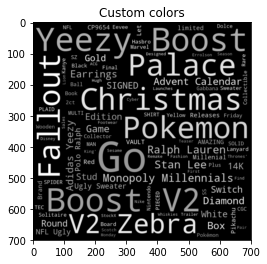

In [8]:
from wordcloud import WordCloud, STOPWORDS
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
mask = np.array(Image.open("noun_Flight_1442204.png"))

stopwords = set(STOPWORDS)
stop_list = ['products', 'collection', 'named', 'new', 'urpdate', 
             'release', 'best', 'deals', 'restocked', 'size']
for sw in stop_list:
    stopwords.add(sw)

wc = WordCloud(max_words=100, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")


In [8]:
asdf = getTweets()
type(asdf)
asdf['t1']

'https://twitframe.com/show?url=https://twitter.com/surbhig1989/status/1066757134140854272'

In [4]:
import requests
import pandas as pd
import tweepy
import os
from bs4 import BeautifulSoup


def getTweets():
	consumer_key = '6CM1Yqk0Qz6KUXsDQUS8xmahS'
	consumer_secret = 'LMSBfoJWMTlder205Ihr2t1JDgwJD2XgKQeWYau25gJix4lm24'
	access_token = '753302551840198656-Qx1HSVIZlqjShSsUeWY4BhRaVEbWVAP'
	access_token_secret = 'iwtFUe30YrmDlMyGACLLNYrpZQutuW2e8QzX03YwOlz97'
	auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
	auth.set_access_token(access_token, access_token_secret)
	api = tweepy.API(auth)


	cfit_tweets = api.search(q=['counterfeit','amazonHelp'], count=1000)
	fake_tweets = api.search(q=['fake','amazonHelp'], count=1000)

	df = pd.DataFrame()
	df['text'] = [x.text for x in cfit_tweets]
	df['source'] = ['twitter: "counterfiet, amazonelp"' for x in cfit_tweets]
	df['url'] = [x.text[x.text.find('http'):].split('\n')[0] for x in cfit_tweets]
	df['retweets'] = [x.retweet_count for x in cfit_tweets]
	df['favorites'] = [x.favorite_count for x in cfit_tweets]
	df['iframe'] = ['https://twitframe.com/show?url=https://twitter.com/{}/status/{}'.format(x.user.screen_name, x.id) for x in cfit_tweets]

	df1 = pd.DataFrame()
	df1['text'] = [x.text for x in fake_tweets]
	df1['source'] = ['twitter: "fake, amazonHelp"' for x in fake_tweets]
	df1['url'] = [x.text[x.text.find('http'):].split('\n')[0] for x in fake_tweets]
	df1['retweets'] = [x.retweet_count for x in fake_tweets]
	df1['favorites'] = [x.favorite_count for x in fake_tweets]
	df1['iframe'] = ['https://twitframe.com/show?url=https://twitter.com/{}/status/{}'.format(x.user.screen_name, x.id) for x in fake_tweets]


	df_final = df.append(df1)
	df_final.sort_values('retweets',ascending=False).drop_duplicates(['text','source']).reset_index().head(50)

	keys = ['t1', 't2']
	keys = ['t'+str(x) for x in range(len(df1['iframe'].tolist()))]
	values = df1['iframe'].tolist()
	return dict(zip(keys, values))

